# eda.ipynb
# -------------------------------
# Customer Churn EDA Notebook
# -------------------------------

In [3]:
# 1️⃣ Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
# -------------------------------
# 2️⃣ Load dataset
# -------------------------------
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# -------------------------------
# 3️⃣ Data Cleaning
# -------------------------------
# Convert TotalCharges to numeric, handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Map Churn to 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

/tmp/ipykernel_843761/2902887896.py:6: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
# -------------------------------
# 4️⃣ Create folders to save results
# -------------------------------
os.makedirs("../reports/figures", exist_ok=True)

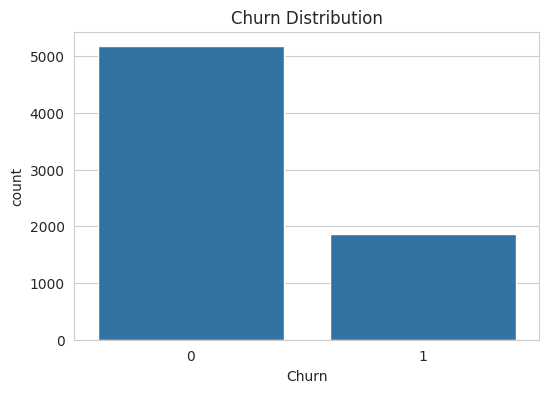

Churn Value Counts:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [7]:
# -------------------------------
# 5️⃣ Churn Distribution
# -------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.savefig("../reports/figures/churn_distribution.png", bbox_inches='tight')
plt.show()

print("Churn Value Counts:\n", df['Churn'].value_counts(normalize=True))

In [8]:
# -------------------------------
# 6️⃣ Churn vs Numeric Features
# -------------------------------
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df[df['Churn']==0][col], label='No Churn', shade=True)
    sns.kdeplot(df[df['Churn']==1][col], label='Churn', shade=True)
    plt.title(f"{col} Distribution by Churn")
    plt.xlabel(col)
    plt.legend()
    plt.savefig(f"../reports/figures/{col}_kde.png", bbox_inches='tight')
    plt.close()

/tmp/ipykernel_843761/1214551880.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No Churn', shade=True)
/tmp/ipykernel_843761/1214551880.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==1][col], label='Churn', shade=True)
/tmp/ipykernel_843761/1214551880.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn']==0][col], label='No Churn', shade=True)
/tmp/ipykernel_843761/1214551880.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df

In [9]:
# -------------------------------
# 7️⃣ Churn vs Categorical Features
# -------------------------------
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.savefig(f"../reports/figures/{col}_churn.png", bbox_inches='tight')
    plt.close()

In [11]:
# -------------------------------
# 8️⃣ Churn Rate per Category (Percentage)
# -------------------------------
records = []

for col in cat_cols:
    temp = df.groupby(col)['Churn'].mean().reset_index()
    temp.columns = [col, 'ChurnRate']
    temp['Feature'] = col
    records.append(temp)

# Combine all into one long-format DataFrame
churn_summary_df = pd.concat(records, ignore_index=True)

# Save to CSV
churn_summary_df.to_csv("../reports/churn_rates.csv", index=False)
print("✅ Churn rates saved to ../reports/churn_rates.csv")

# Optional: display first few rows
churn_summary_df.head()

✅ Churn rates saved to ../reports/churn_rates.csv


,gender,ChurnRate,Feature,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0.269209,gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male,0.261603,gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.236062,SeniorCitizen,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.416813,SeniorCitizen,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.329580,Partner,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


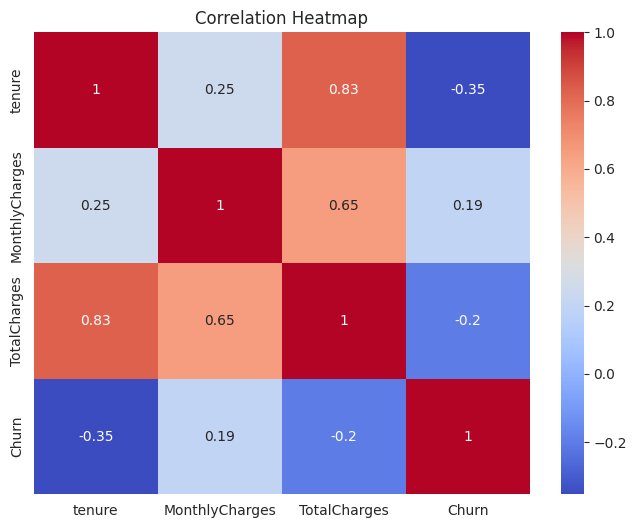

✅ All EDA plots saved to ../reports/figures/


In [12]:
# -------------------------------
# 9️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("../reports/figures/correlation_heatmap.png", bbox_inches='tight')
plt.show()

print("✅ All EDA plots saved to ../reports/figures/")